In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [3]:
#학습데이터, 검증데이터, 테스트데이터 분리
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#평균과 표준편차는 채널별로 구해줍니다
x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,
                                               random_state=777)
#모델구성 및 학습 -> 드롭아웃 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',
                 input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2)) #드롭아웃추가 
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2)) #드롭아웃추가 
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2)) #드롭아웃추가 
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
#이동값: 1e=4=0.0001
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [8]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 48s 16ms/step - loss: 1.7094 - acc: 0.3791 - val_loss: 1.4003 - val_acc: 0.5001
Epoch 2/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.3598 - acc: 0.5121 - val_loss: 1.2432 - val_acc: 0.5532
Epoch 3/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.2162 - acc: 0.5677 - val_loss: 1.1327 - val_acc: 0.5963
Epoch 4/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.1035 - acc: 0.6082 - val_loss: 1.0587 - val_acc: 0.6225
Epoch 5/30
1094/1094 [==============================] - 17s 16ms/step - loss: 1.0142 - acc: 0.6438 - val_loss: 0.9501 - val_acc: 0.6622
Epoch 6/30
1094/1094 [==============================] - 17s 16ms/step - loss: 0.9335 - acc: 0.6707 - val_loss: 0.9047 - val_acc: 0.6809
Epoch 7/30
1094/1094 [==============================] - 17s 16ms/step - loss: 0.8750 - acc: 0.6935 - val_loss: 0.8602 - val_acc: 0.6998
Epoch 8/30
1094/1094 [==========================

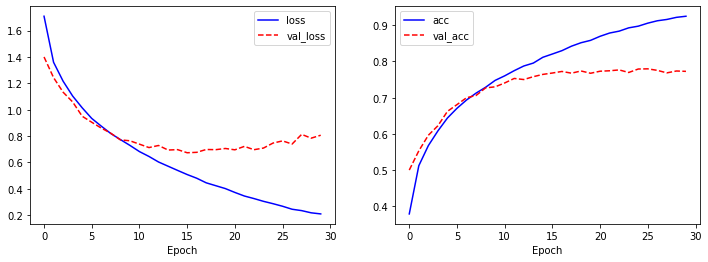

In [9]:
import matplotlib.pyplot as plt
hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss,'b-',label='loss')
plt.plot(val_loss,'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc,'b-',label='acc')
plt.plot(val_acc,'r--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
#성능향상
#VGGNET 방식사용: 깊은 신경망 사용
#이미지 제너레이터: 하나의 이미지를 변형하여 사용
#데이터 증식, 수집 데이터가 적은 경우 성능 향상에 좋다
#데이터 증식방식 이해하기

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [29]:
train_datagen=ImageDataGenerator(horizontal_flip =True, #수평방향으로 뒤집기
                                 vertical_flip=True, #수직방향으로 뒤집기
                                 shear_range=0.5, #시계반대방향으로 이미지 밀기
                                 brightness_range=[0.5,1.0], #이미지 밝기조정
                                 zoom_range=0.2, #이미지를 확대/축소하기
                                 width_shift_range=0.1, #가로방향 이동
                                 height_shift_range=0.1, #세로방향 이동
                                 rotation_range=30, #이미지 회전
                                 fill_mode='nearest') #이미지 변환시 픽셀 채울 수 있는 방법
                                

In [30]:
import tensorflow as tf 
image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image_path
image=plt.imread(image_path)

In [31]:
#제너레이터를 사용해서 이미지를 변환

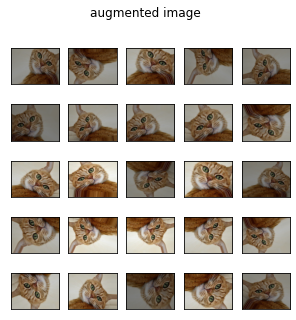

In [32]:
image=image.reshape((1,)+image.shape)
#train_generator: 이미지를 한개씩 생성하여 리턴
train_generator = train_datagen.flow(image, batch_size=1)
fig=plt.figure(figsize=(5,5))
fig.suptitle('augmented image')
for i in range(25): #25번 반복
  data=next(train_generator) #제너레이터에서 이미지를 받아옵니다
  image=data[0]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype=np.uint8), cmap='gray')
plt.show()

## 데이터 증식을 이용하여 학습하기

In [10]:
from tensorflow.keras.datasets import cifar10
import numpy as np

#학습데이터, 검증데이터, 테스트데이터 분리
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#평균과 표준편차는 채널별로 구해줍니다
x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,
                                               random_state=777)

170508288/170498071 [==============================] - 6s 0us/step


In [11]:
print(y_train.shape) #(35000,1)
y_train=np.squeeze(y_train)
y_val=np.squeeze(y_val)
print(y_train.shape) #(35000,1)

(35000, 1)
(35000,)


In [12]:
#이미지 제너레이터를 이용하여 모델 학습하기
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

train_datagen=ImageDataGenerator(horizontal_flip =True, #수평방향으로 뒤집기
                                 zoom_range=0.2, #이미지를 확대/축소하기
                                 width_shift_range=0.1, #가로방향 이동
                                 height_shift_range=0.1, #세로방향 이동
                                 rotation_range=30, #이미지 회전
                                 fill_mode='nearest') #이미지 변환시 픽셀 채울 수 있는 방법                                

In [14]:
#검증 데이터셋에는 변환을 사용하지 않습니다
val_datagen=ImageDataGenerator()
batch_size=32
train_generator=train_datagen.flow(x_train,y_train,batch_size=batch_size)
val_generator=val_datagen.flow(x_val,y_val,batch_size=batch_size)

배치정규화:학습데이터의 불확실성을 해소하기위한 설정, 큰 범위의 출력값의 분포를 줄여주어 불확실성을 어느 정도 감소시키는 방법. 출력값이 손실/폭발 경우에 범위 내의 값으로 변환하여 학습하는 기능

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256));
model.add(Activation('relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [17]:
def get_step(train_len,batch_size):
  if(train_len % batch_size>0):
    return train_len//batch_size+1
  else:
    return train_len/batch_size

In [19]:
history=model.fit(train_generator,epochs=100,
                  steps_per_epoch=get_step(len(x_train), batch_size),
                  validation_data=val_generator,
                  validation_steps=get_step(len(x_val),batch_size))

Epoch 1/100
1094/1094 [==============================] - 66s 33ms/step - loss: 1.7692 - acc: 0.3563 - val_loss: 1.4762 - val_acc: 0.4678
Epoch 2/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.4946 - acc: 0.4655 - val_loss: 1.3427 - val_acc: 0.5099
Epoch 3/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.3726 - acc: 0.5091 - val_loss: 1.2345 - val_acc: 0.5481
Epoch 4/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.2758 - acc: 0.5470 - val_loss: 1.1826 - val_acc: 0.5763
Epoch 5/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.2096 - acc: 0.5709 - val_loss: 1.0527 - val_acc: 0.6211
Epoch 6/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.1541 - acc: 0.5909 - val_loss: 1.0498 - val_acc: 0.6304
Epoch 7/100
1094/1094 [==============================] - 36s 33ms/step - loss: 1.1031 - acc: 0.6083 - val_loss: 1.0186 - val_acc: 0.6376
Epoch 8/100
1094/1094 [==================